---
---
# INFORME SOBRE ATAQUES AL CORAZON
---
---

In [1]:
# Importo algunas de las librerias a utilizar

import numpy as np   # Importamos librerias de calculo
import pandas as pd  # Importamos librerias de uso de tablas o los dataframes
import seaborn as sns # Importamos librerias de graficos
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Siguiente paso, determinar donde esta alojado el dataset, y cargarlo para poder mostrar como esta compuesto
url='https://raw.githubusercontent.com/NestorDiazDataSC/Analisis_de_Datos/main/Estudio_Ataques_al_Corazon/heart_failure.csv'

df= pd.read_csv(url)
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.describe () # Muestra estadistica basica del dataframe

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
df.info()   # Muestra que tipo de variables hay en cada columna del dataframe mas otra información adicional

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.isnull().sum() # Para ver la cantidad de valores nulos de cada columna, en este caso puntual se puede ver que no tiene valores nulos

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.columns # Para mostrar los nombres de las columnas

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
df.columns = ['Edad', 'Anemia', 'Creatinina', 'Diabetes', 'Fracción de Eyección', 'Presion Alta', 'Plaquetas', 'Creatinina Suero', 'Sodio Suero', 'Sexo', 'Fumador', 'Tiempo', 'Fallecido']
# Renombro las columnas, traduciendo al castellano para facilitar mi analisis.

In [8]:
df.head (3) # Muestreo de como quedo el dataset con los nuevos nombres en las columnas.

,Edad,Anemia,Creatinina,Diabetes,Fracción de Eyección,Presion Alta,Plaquetas,Creatinina Suero,Sodio Suero,Sexo,Fumador,Tiempo,Fallecido
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [9]:
df.corr()

,Edad,Anemia,Creatinina,Diabetes,Fracción de Eyección,Presion Alta,Plaquetas,Creatinina Suero,Sodio Suero,Sexo,Fumador,Tiempo,Fallecido
Edad,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
Anemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
Creatinina,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
Diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
Fracción de Eyección,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
Presion Alta,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
Plaquetas,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
Creatinina Suero,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
Sodio Suero,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
Sexo,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Text(0.5, 1.0, 'Matriz de Correlación')

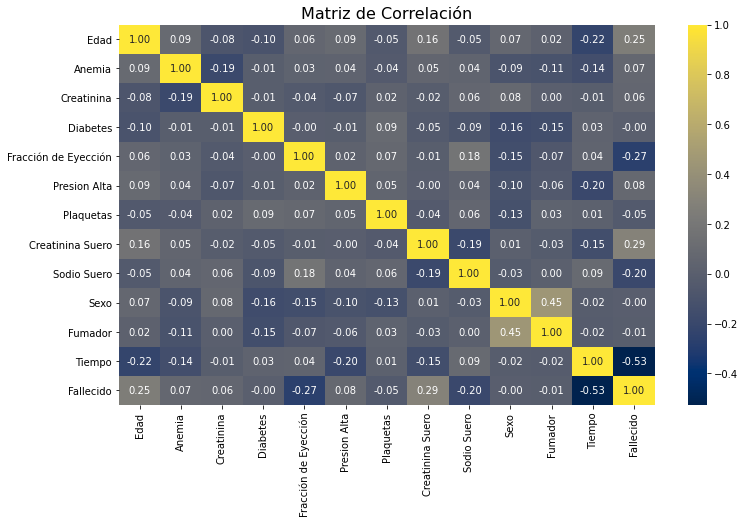

In [10]:
# Calculo de la matriz de correlacion de estos datos.
Cormat = df.corr()
Cormat

f, ax = plt.subplots(figsize=(12,7))
sns.heatmap(Cormat, vmax=1, square=False, annot=True, fmt=".2f", cmap="cividis")
plt.title("Matriz de Correlación", fontsize=16)

                vmax: Hasta donde llega el gradiente, el difuminado de color (valor entre .1 y 1).
                square: Para mostrar cada valor con forma cuadrada (si es true) o rectangular (si es false).
                anot: muestra o no los valores dentro de cada recuadro.
                fmt: redondea los valores de los recuadros a 2 decimales.
                cmap: muestra colores mas intuitivos (opciones: RdBu, magma, plasma, viridis, blues, oranges, seismic, coolwarm).
                cmap: adicional si quiero invertir los colores a cualquier valor agregar _r al final.

Como se interpreta lo que se ve en este grafico: 

El grafico muestra las correlaciones que hay entre las diferentes columnas, si las correlaciones son positivas van a ir en un rango entre 0 y 1, a mas cercano sea el valor a 1 mas correlacionadas estaran las variables y por lo tanto en el grafico se presentara con un color mas claro (en este caso tendera a ser mas amarillo), esto quiere decir que si un valor aumenta, la otra
variable tambien lo hará porque hay una relación entre ambas. De forma opuesta sucede igual, valores negativos entre -1 y 0.
En numeros mas cercanos a -1 se obtienen correlaciones inversas totalmente que seran representadas con los colores mas oscuros.```

### Simplificando:
### Vamos a simplificar mostrando las 7 mejores correlaciones que puedo encontrar.

In [11]:
K = 7 # Definimos cuantas columnas me va a seleccionar como las mas correlacionadas.

In [12]:
cols = Cormat.nlargest(K, "Edad")["Edad"].index

In [13]:
cols # Me va a decir las 7 variables mas relacionadas con "Edad"

Index(['Edad', 'Fallecido', 'Creatinina Suero', 'Presion Alta', 'Anemia',
       'Sexo', 'Fracción de Eyección'],
      dtype='object')

In [14]:
# Definimos una nueva variable, haciendo la matriz mas chica para ver mejor las relaciones
cm = np.corrcoef(df[cols].values.T)

In [15]:
cm

array([[ 1.        ,  0.25372854,  0.15918713,  0.09328868,  0.08800644,
         0.06542952,  0.06009836],
       [ 0.25372854,  1.        ,  0.29427756,  0.07935106,  0.0662701 ,
        -0.00431638, -0.26860331],
       [ 0.15918713,  0.29427756,  1.        , -0.00493453,  0.0521736 ,
         0.00696978, -0.01130247],
       [ 0.09328868,  0.07935106, -0.00493453,  1.        ,  0.038182  ,
        -0.10461463,  0.02444473],
       [ 0.08800644,  0.0662701 ,  0.0521736 ,  0.038182  ,  1.        ,
        -0.09476896,  0.03155697],
       [ 0.06542952, -0.00431638,  0.00696978, -0.10461463, -0.09476896,
         1.        , -0.14838597],
       [ 0.06009836, -0.26860331, -0.01130247,  0.02444473,  0.03155697,
        -0.14838597,  1.        ]])

In [16]:
sns.set(font_scale=1.25) # Tamaño de la fuente del grafico

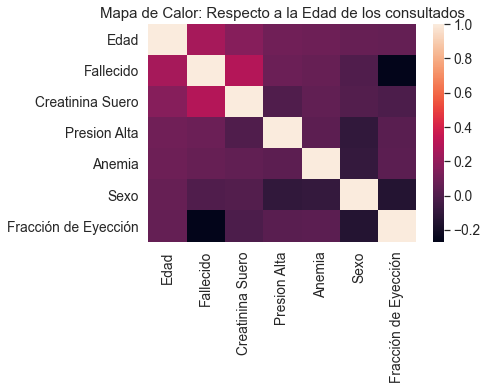

In [17]:
hm = sns.heatmap(cm, cbar=True, annot=False, square=False, fmt=".2f", annot_kws={"size":10,}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Mapa de Calor: Respecto a la Edad de los consultados')
plt.show()


#### Ahora probando con otro tipo de valor, con "Fallecido" para ver si hay una mejor correlacion con otros datos.¶

In [18]:
cols = Cormat.nlargest(K, "Fallecido")["Fallecido"].index

In [19]:
cols # Me va a decir las 5 variables mas relacionadas con Fallecido

Index(['Fallecido', 'Creatinina Suero', 'Edad', 'Presion Alta', 'Anemia',
       'Creatinina', 'Diabetes'],
      dtype='object')

In [20]:
cm = np.corrcoef(df[cols].values.T)

In [21]:
cm


array([[ 1.        ,  0.29427756,  0.25372854,  0.07935106,  0.0662701 ,
         0.06272816, -0.00194288],
       [ 0.29427756,  1.        ,  0.15918713, -0.00493453,  0.0521736 ,
        -0.01640848, -0.04697532],
       [ 0.25372854,  0.15918713,  1.        ,  0.09328868,  0.08800644,
        -0.0815839 , -0.10101239],
       [ 0.07935106, -0.00493453,  0.09328868,  1.        ,  0.038182  ,
        -0.07058998, -0.01273238],
       [ 0.0662701 ,  0.0521736 ,  0.08800644,  0.038182  ,  1.        ,
        -0.19074103, -0.01272905],
       [ 0.06272816, -0.01640848, -0.0815839 , -0.07058998, -0.19074103,
         1.        , -0.00963851],
       [-0.00194288, -0.04697532, -0.10101239, -0.01273238, -0.01272905,
        -0.00963851,  1.        ]])

In [22]:
sns.set(font_scale=1.25) # Tamaño de la fuente del grafico

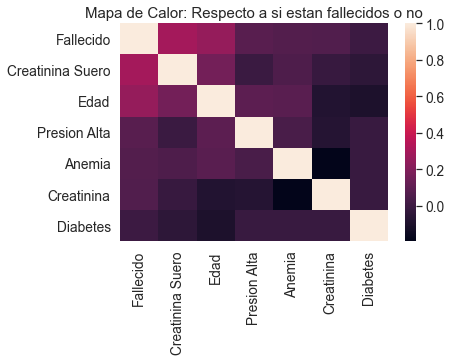

In [23]:
hm = sns.heatmap(cm, cbar=True, annot=False, square=False, fmt=".2f", annot_kws={"size":10,}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Mapa de Calor: Respecto a si estan fallecidos o no')
plt.show()


In [24]:
cols = Cormat.nlargest(K, "Anemia")["Anemia"].index

In [25]:
cols # Me va a decir las 5 variables mas relacionadas con Fallecido

Index(['Anemia', 'Edad', 'Fallecido', 'Creatinina Suero', 'Sodio Suero',
       'Presion Alta', 'Fracción de Eyección'],
      dtype='object')

In [26]:
cm = np.corrcoef(df[cols].values.T)

In [27]:
cm

array([[ 1.        ,  0.08800644,  0.0662701 ,  0.0521736 ,  0.04188161,
         0.038182  ,  0.03155697],
       [ 0.08800644,  1.        ,  0.25372854,  0.15918713, -0.04596584,
         0.09328868,  0.06009836],
       [ 0.0662701 ,  0.25372854,  1.        ,  0.29427756, -0.1952036 ,
         0.07935106, -0.26860331],
       [ 0.0521736 ,  0.15918713,  0.29427756,  1.        , -0.18909521,
        -0.00493453, -0.01130247],
       [ 0.04188161, -0.04596584, -0.1952036 , -0.18909521,  1.        ,
         0.03710947,  0.17590228],
       [ 0.038182  ,  0.09328868,  0.07935106, -0.00493453,  0.03710947,
         1.        ,  0.02444473],
       [ 0.03155697,  0.06009836, -0.26860331, -0.01130247,  0.17590228,
         0.02444473,  1.        ]])

In [28]:
sns.set(font_scale=1.25) # Tamaño de la fuente del grafico

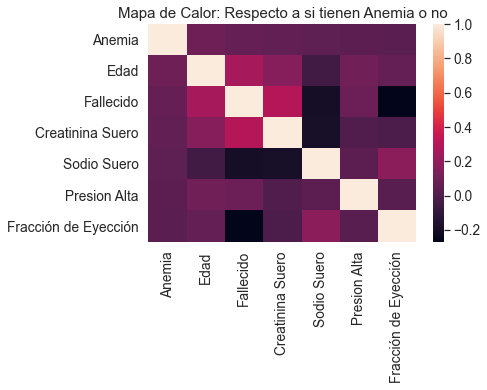

In [29]:
hm = sns.heatmap(cm, cbar=True, annot=False, square=False, fmt=".2f", annot_kws={"size":10,}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Mapa de Calor: Respecto a si tienen Anemia o no')
plt.show()


Conclusiones: Hay muy pocas correlaciones entre los datos, igualmente en los datos podemos encontrar que la de mayor correlación que existe es entre los datos de fallecimientos relacionados con datos de la Creatinina en Suero y la Edad.

### Graficamos para ver mejor estas correlaciones

In [30]:
sns.set() # Le decimos a Seaborn que grafique con la configuracion de defecto.

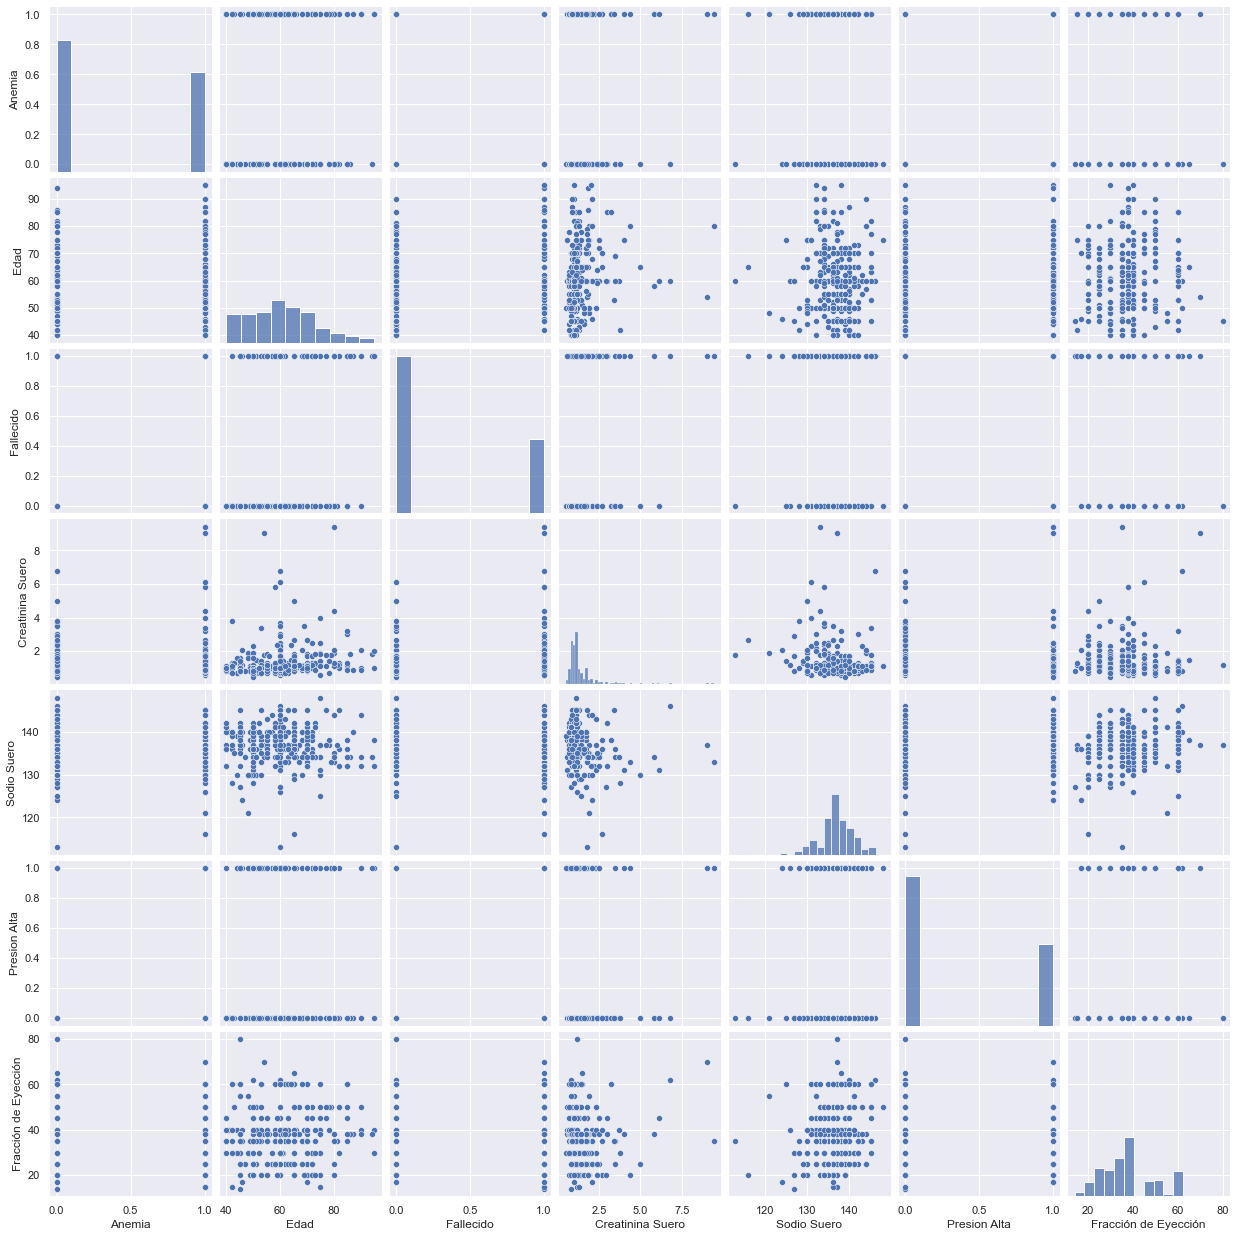

In [31]:
cols = ["Anemia", "Edad", "Fallecido", "Creatinina Suero", "Sodio Suero", "Presion Alta", "Fracción de Eyección"]

sns.pairplot(df[cols], height=2.5)
plt.show()

Solo encuentro relación entre los datos de "Creatinina en Suero" y "Edad" con "Fallecimientos", procedo a correr un analisis de correlación de Pearson para ver la fuerza que existe en la correlación de estos datos, con esto se vera la fuerza de la relación y si va a tender a ser lineal o no, esto determina si me sirve para el analisis.

In [32]:
correlation_matrix = np.corrcoef(df["Edad"], df["Fallecido"])
correlation_coefficient = correlation_matrix[0, 1]
print(correlation_coefficient)

0.25372854308800363


El resultado es un coeficiente de correlación de 0.2537, aunque es positivo, indica una relación débil entre estas dos variables. Esto significa que hay una tendencia a que las variables aumenten juntas, pero la relación no es fuerte ni lineal como para tenerla en cuenta.

In [33]:
correlation_matrix = np.corrcoef(df["Creatinina Suero"], df["Fallecido"])
correlation_coefficient = correlation_matrix[0, 1]
print(correlation_coefficient)

0.2942775609841493


Igual se da en este caso, si bien es positivo el coeficiente, indica que es una correlación debil.

Como resultado no hay fuentes de información que posean una correlación significante para hacer un analisis y predecir resultados aplicando un modelo de correlacion lineal de 1 o multiples variables. Razon por la cual continuo haciendo el analisis pero utilizando algo mas complejo que es a aplicar un algoritmo de "Arboles de Decisión" a modo de estudio/ejemplo y luego si plantear un estudio con "Random Forest".

---
### ▪ Arboles de Decision
---

In [34]:
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import numpy as np

In [35]:
# Cargamos los datos y los dividimos en conjuntos para entrenar y testear.
data = df
y = data["Fallecido"]
X = data.drop(["Fallecido"], axis=1)
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                                     y,
                                     test_size=0.33,
                                     random_state=42)

In [36]:
# Primero creamos un arbol de decisión para ver la precisión y poder compararla
tree = DecisionTreeClassifier(max_depth=2, random_state=11) # Max depth acorta el arbol si no salia muy extenso.
tree.fit(X_train, y_train)
print(f"La precisión del Arbol de decisión es de: {tree.score(X_test, y_test)}")

La precisión del Arbol de decisión es de: 0.7676767676767676


Este resultado me indica que este modelo es capas de predecir correctamente el 76% de las muestras del conjunto de prueba. Es un rendimiento razonable para seguir analizando puesto que es una practica.

In [37]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=11)

In [38]:
from sklearn.tree import plot_tree # Importamos para graficar el arbol de decisión.
import matplotlib.pyplot as plt # Para manejar el tamaño del grafico del arbol.

### A) Visualizando el modelo

<Figure size 720x360 with 0 Axes>

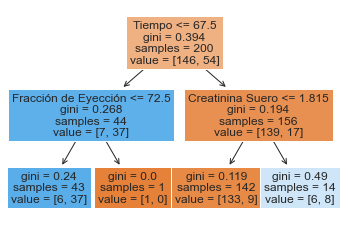

<Figure size 720x360 with 0 Axes>

In [39]:
plot_tree(decision_tree=tree, feature_names=X_train.columns, filled=True, fontsize=12);
plt.figure(figsize=(10,5))

# Feature=nombre de columnas,
# Filled=Para colorear el arbol,
# El punto y coma al final del codigo se utiliza para que no se muestre todo el texto del arbol de decision y solo muestre el grafico

Interpretando este modelo: La condicion principal es "Tiempo", si el valor tiempo es menor a 67,5 se sigue por la rama derecha en este caso, por el contrario sera por la rama izquierda. Luego si en el valor "Creatinina Suero" se cumple que es menor o igual a 1.815 se sigue por la rama de abajo a la izquierda de la actual, llegando al final de la rama en este caso. Tenemos "value=[133,9]" y "samples=142", para interpretar esto tenemos que dividir 133/142 para saber que la probabilidad de que salga en esta rama es de 93.66%

Otro dato importante es que cuanto más cercano a 0 sea el valor del coeficiente de Gini, mayor será la pureza en términos de clasificación de las muestras en esa hoja. Al contrario si tenemos un valor más alto o alejado de 0, indica una mezcla de diferentes clases en las muestras lo que hace que pierda pureza.


### B) Calculando predicciones

In [40]:
a = data.iloc[99]*1.2 
a

# Tomo un valor del dataframe, en este caso de la fila 99 y para que no sea similar la multiplico por 1.2 para obtener nuevos
# valores como si fueran estos lo que quiero predecir con el arbol de decisión.


Edad                        75.60
Anemia                       1.20
Creatinina                  73.20
Diabetes                     1.20
Fracción de Eyección        48.00
Presion Alta                 0.00
Plaquetas               265200.00
Creatinina Suero             1.32
Sodio Suero                168.00
Sexo                         0.00
Fumador                      0.00
Tiempo                     103.20
Fallecido                    0.00
Name: 99, dtype: float64

In [41]:
# Por ejemplo defino la variable segun los valores de la fila 99 x 1,2.
dato1 = 75.60, 1.2, 73.20, 1.20, 48, 0, 265200.0, 1.32, 168, 0, 0, 103.20
prediction = tree.predict_proba([dato1])
print (prediction)

[[0.93661972 0.06338028]]


In [42]:
# Esta matriz de arriba quiere decir que para los valores de la fila 99 (x1,2) hay un 93.66% de que su valor sea 0 (osea vivo) 
# y hay un 0.06% de probabilidades de que el valor sea 1 (osea fallecido) durante el periodo de estudio.

Text(0.5, 0, 'Tiempo (días)')

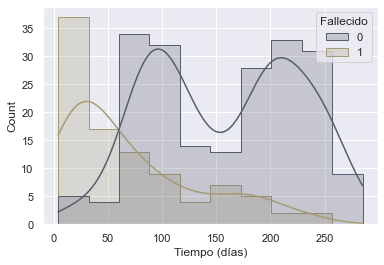

In [43]:
sns.histplot(x=df.Tiempo, hue=data.Fallecido, kde=True, palette="cividis", element="step")

plt.xlabel("Tiempo (días)")

---
### Random Forest
---


Ahora aplico el algoritmo de bosques aleatorios, el anterior fue a modo de practica y para plantear uno de los arboles y como
se van ramificando.

In [44]:
# Cargamos los datos y los dividimos en conjuntos para entrenar y testear.
y = df["Fallecido"]
X = df.drop(["Fallecido"], axis=1)
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                                     y,
                                     stratify=y,
                                     test_size=0.33,
                                     random_state=11)

Como se componen los datos:

El dataset se compone de 13 columnas. 12 corresponden a variables independientes, que usaremos para predecir el target y 1 (Fallecido) es la variable a predecir. Todas las variables son numéricas, ya sea enteras o reales y no tiene valores nulos


In [45]:
df.sample(4)

,Edad,Anemia,Creatinina,Diabetes,Fracción de Eyección,Presion Alta,Plaquetas,Creatinina Suero,Sodio Suero,Sexo,Fumador,Tiempo,Fallecido
270,44.0,0,582,1,30,1,263358.03,1.6,130,1,1,244,0
269,40.0,0,582,1,35,0,222000.00,1.0,132,1,0,244,0
242,40.0,0,90,0,35,0,255000.00,1.1,136,1,1,212,0
250,50.0,0,2522,0,30,1,404000.00,0.5,139,0,0,214,0


Creamos un bosque aleatorio, con 200 arboles,

In [46]:
model = RandomForestClassifier(random_state=10, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)
print(f"La precisión del Random Forest es: {model.score(X_test, y_test)}")

La precisión del Random Forest es: 0.8787878787878788


In [47]:
classifier=model.fit(X_train, y_train) #Construimos el modelo sobre los datos de entrenamiento

In [48]:
predictions=classifier.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predictions,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")
print()
print ("Cuanto menor sea el valor, mejor será el rendimiento del modelo. Un MSE igual a cero indica predicciones perfectas.")

El error (rmse) de test es: 0.3481553119113957

Cuanto menor sea el valor, mejor será el rendimiento del modelo. Un MSE igual a cero indica predicciones perfectas.


Matriz de confusión
[[58  9]
 [ 3 29]]
Los valores de la diagonal principal (a) y (d) se corresponden con los valores estimados de forma correcta por el modelo
tanto los verdaderos positivos_ TP(d), como los verdaderos negativos_TN(a)
La otra diagonal, por tanto, representa los casos en los que el modelo «se ha equivocado»
(c) son falsos negativos_FN, (b) serán los falsos positivos_FP



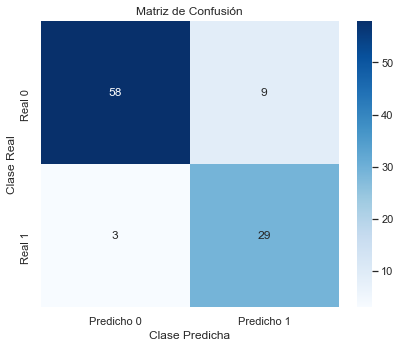


Métricas de clasificación
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        67
           1       0.76      0.91      0.83        32

    accuracy                           0.88        99
   macro avg       0.86      0.89      0.87        99
weighted avg       0.89      0.88      0.88        99

0.8787878787878788

La exactitud («accuracy«) representa el porcentaje de predicciones correctas frente al total. Es el cociente entre los
casos bien clasificados por el modelo (verdaderos positivos y verdaderos negativos, es decir, los valores en la 
diagonal de la matriz de confusión), y la suma de todos los casos.
Cuando un conjunto de datos es poco equilibrado, no es una métrica útil

La sensibilidad («Recuperacion|Recall«) representa la habilidad del modelo de detectar los casos relevantes, es mas util
cuando los datos no son tan equilibrados. En otras palabras, representa la tasa

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Imprimir la matriz de confusión en texto
print("Matriz de confusión")
print(confusion_matrix(y_test, predictions))
print("Los valores de la diagonal principal (a) y (d) se corresponden con los valores estimados de forma correcta por el modelo")
print("tanto los verdaderos positivos_ TP(d), como los verdaderos negativos_TN(a)")
print("La otra diagonal, por tanto, representa los casos en los que el modelo «se ha equivocado»")
print("(c) son falsos negativos_FN, (b) serán los falsos positivos_FP")
print()

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Crear el mapa de calor de la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Predicho 0", "Predicho 1"], 
            yticklabels=["Real 0", "Real 1"])

# Agregar etiquetas y títulos
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

print()
print("Métricas de clasificación")
print("-----------------------------------------------------")
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

print ()
print ("La exactitud («accuracy«) representa el porcentaje de predicciones correctas frente al total. Es el cociente entre los")
print ("casos bien clasificados por el modelo (verdaderos positivos y verdaderos negativos, es decir, los valores en la ")
print ("diagonal de la matriz de confusión), y la suma de todos los casos.")
print ("Cuando un conjunto de datos es poco equilibrado, no es una métrica útil")
print ()
print ("La sensibilidad («Recuperacion|Recall«) representa la habilidad del modelo de detectar los casos relevantes, es mas util")
print ("cuando los datos no son tan equilibrados. En otras palabras, representa la tasa de verdaderos positivos")
print ("(True Positive Rate) ó TP. Es la proporción entre los casos positivos bien clasificados por el modelo, respecto al ")
print ("total de positivos.")


In [51]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': classifier.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
11,Tiempo,0.278026
7,Creatinina Suero,0.170119
4,Fracción de Eyección,0.144110
0,Edad,0.093875
2,Creatinina,0.085490
8,Sodio Suero,0.082222
6,Plaquetas,0.081860
1,Anemia,0.016017
3,Diabetes,0.014857
9,Sexo,0.012089


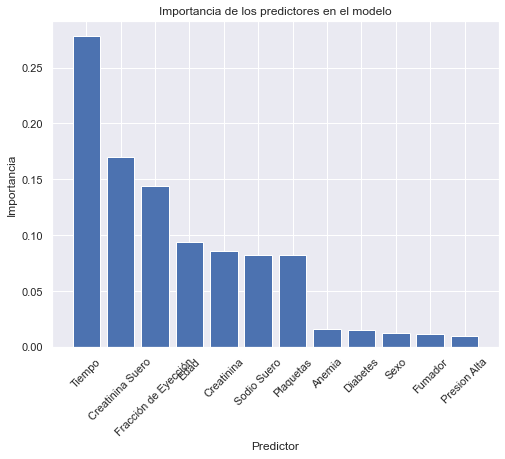

In [52]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Ordenar los predictores por importancia descendente
importancia_predictores = importancia_predictores.sort_values('importancia', ascending=False)

# Graficar la importancia de los predictores
ax.bar(importancia_predictores['predictor'], importancia_predictores['importancia'])

# Personalizar la apariencia del gráfico
ax.set_xlabel('Predictor')
ax.set_ylabel('Importancia')
ax.set_title('Importancia de los predictores en el modelo')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

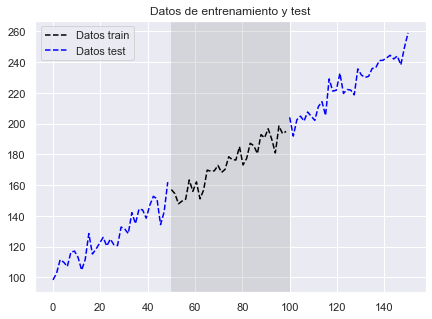

In [53]:
# Datos simulados
# ==============================================================================
X = np.linspace(0, 150, 100)
y = (X + 100) + np.random.normal(loc=0.0, scale=5.0, size=X.shape)
X_train = X[(X>=50) & (X<100)]
y_train = y[(X>=50) & (X<100)]
X_test_inf = X[X < 50]
y_test_inf = y[X < 50]
X_test_sup = X[X >= 100]
y_test_sup = y[X >= 100]

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(X_train, y_train, c='black', linestyle='dashed', label = "Datos train")
ax.axvspan(50, 100, color='gray', alpha=0.2, lw=0)
ax.plot(X_test_inf, y_test_inf, c='blue', linestyle='dashed', label = "Datos test")
ax.plot(X_test_sup, y_test_sup, c='blue', linestyle='dashed')
ax.set_title("Datos de entrenamiento y test")
plt.legend();


Aqui ya se encuentra generado el bosque aleatorio (Ramdon Forest) que determina medianamente un buen resultado, no es optimo pero sirve para probar todos los pasos del proceso de este algoritmo. Teniendo el bosque aleatorio ya creado ahora puedo predecir que clasificación puede dar.

In [54]:
print ("Predicción", classifier.predict ([[38, 1, 500, 0, 38, 1, 16200, 1.3, 130, 1, 0, 7]]))

Predicción [1]


Resultado, [1] quiere decir que clasifico como "fallecido" a la persona cuyos datos quisimos predecir.

---
### ▪ K-NN (K - Nearest Neighbors)
---

In [55]:
# Verifico que todos los valores sean numericos.
df.dtypes

Edad                    float64
Anemia                    int64
Creatinina                int64
Diabetes                  int64
Fracción de Eyección      int64
Presion Alta              int64
Plaquetas               float64
Creatinina Suero        float64
Sodio Suero               int64
Sexo                      int64
Fumador                   int64
Tiempo                    int64
Fallecido                 int64
dtype: object

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

In [57]:
# Separo la variable objetivo y las predictoras
X = df.drop('Fallecido', axis=1)
y = df['Fallecido']

In [58]:
# Escalar variables (significa hacer una normalizacion estandard, llevar cada variable a una escala donde tenga
# media 0 y desviación estándar 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar y testear
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

# Aplicar KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
# Predecir el modelo
y_pred = knn.predict(X_test)

In [60]:
# Evaluar el MSE del modelo
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

MSE: 0.32


Este modelo (K-NN) entrega un ligeramente un mejor resultado (MSE=0.32) que el modelo basado en Random Forest (MSE=0.34). Puesto que a menor MSE menor error cometera el modelo.

In [61]:
nueva_observacion = [[38, 1, 500, 0, 38, 1, 16200, 1.3, 130, 1, 0, 7]] # Mismos valores que intente predecir en Ramdon Forest

# Escalar variables
nueva_observacion_escalada = scaler.transform(nueva_observacion)

# Predecimos con el modelo ya entrenado
prediccion = knn.predict(nueva_observacion_escalada)

print("Predicción:", prediccion)

Predicción: [1]


Resultado, [1] quiere decir que tambien este modelo clasificó como "fallecido" a la persona cuyos datos quise predecir.

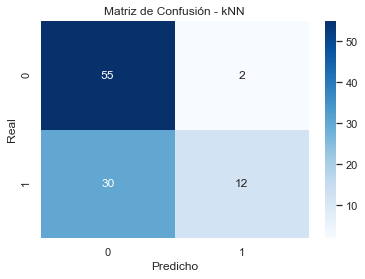

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, knn.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - kNN")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()